In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("DatasetMamikosMachineLearningSheetJS.csv")

In [ ]:
data.head()

,nama,harga,rating,jenis,Kamar Mandi Dalam,Wifi,AC,Kloset Duduk,Kasur
0,Kost Apik Aisyah Kukusan Tipe A Beji Depok,1143000,,Putri,KMD,NaN,AC,NaN,Kasur
1,Kost Apik UI Puspita Tipe A Kukusan Beji Depok,1323000,,Putri,KMD,WiFi,AC,NaN,Kasur
2,Kost Singgahsini Alhidayah EMH-4 Tipe A Beji ...,1683000,,Putri,KMD,WiFi,AC,KD,Kasur
3,Kost Apik Duta Residence Tipe A Sukmajaya Depok,1548000,,Campur,KMD,WiFi,AC,KD,Kasur
4,Kost Apik UI Puspita Tipe B Kukusan Beji Depok,1233000,,Putri,KMD,WiFi,AC,NaN,Kasur


In [ ]:
data.tail()

,nama,harga,rating,jenis,Kamar Mandi Dalam,Wifi,AC,Kloset Duduk,Kasur
10995,Kost Va Tipe A1 Jagakarsa Jakarta Selatan,700000,,Putra,NaN,WiFi,NaN,KD,Kasur
10996,Kost Pondok Katama Tipe B Beji Depok,900000,,Putra,NaN,WiFi,NaN,NaN,Kasur
10997,Kost Wisma Violet Beji Depok,800000,,Putri,KMD,WiFi,NaN,NaN,NaN
10998,Kost Eksklusif Mara Juara Tipe Large Bedroom B...,2499000,,Campur,KMD,WiFi,AC,KD,Kasur
10999,Kost Giyan Exclusive Tipe Reguler Beji Depok,1100000,,Campur,KMD,NaN,AC,KD,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nama               11000 non-null  object
 1   harga              11000 non-null  int64 
 2    rating            11000 non-null  object
 3   jenis              11000 non-null  object
 4   Kamar Mandi Dalam  9976 non-null   object
 5   Wifi               8118 non-null   object
 6   AC                 5816 non-null   object
 7   Kloset Duduk       7182 non-null   object
 8   Kasur              10702 non-null  object
dtypes: int64(1), object(8)
memory usage: 773.6+ KB


In [ ]:
data.shape

(11000, 9)

In [ ]:
# mencari data kosong
data.isnull().sum()

nama                    0
harga                   0
 rating                 0
jenis                   0
Kamar Mandi Dalam    1024
Wifi                 2882
AC                   5184
Kloset Duduk         3818
Kasur                 298
dtype: int64

In [ ]:
## mengisi nilai kosong dengan "0" pada data
data.fillna('0',axis=0,inplace=True)

In [ ]:
# menampilkan tipe data
data.dtypes

nama                 object
harga                 int64
 rating              object
jenis                object
Kamar Mandi Dalam    object
Wifi                 object
AC                   object
Kloset Duduk         object
Kasur                object
dtype: object

In [ ]:
# mencari data kosong
data.isnull().sum()

nama                 0
harga                0
 rating              0
jenis                0
Kamar Mandi Dalam    0
Wifi                 0
AC                   0
Kloset Duduk         0
Kasur                0
dtype: int64

In [ ]:
data.head(10)

,nama,harga,rating,jenis,Kamar Mandi Dalam,Wifi,AC,Kloset Duduk,Kasur
0,Kost Apik Aisyah Kukusan Tipe A Beji Depok,1143000,,Putri,KMD,0,AC,0,Kasur
1,Kost Apik UI Puspita Tipe A Kukusan Beji Depok,1323000,,Putri,KMD,WiFi,AC,0,Kasur
2,Kost Singgahsini Alhidayah EMH-4 Tipe A Beji ...,1683000,,Putri,KMD,WiFi,AC,KD,Kasur
3,Kost Apik Duta Residence Tipe A Sukmajaya Depok,1548000,,Campur,KMD,WiFi,AC,KD,Kasur
4,Kost Apik UI Puspita Tipe B Kukusan Beji Depok,1233000,,Putri,KMD,WiFi,AC,0,Kasur
5,Kost Apik Duta Residence Tipe B Sukmajaya Depok,1008000,50,Campur,KMD,WiFi,0,0,Kasur
6,Kost Apik Griya Osfa UI Tipe A Beji Depok,1368000,,Putri,KMD,WiFi,AC,0,Kasur
7,Kost Apik Wisma Okki Tipe B Beji Depok,1008000,47,Putri,KMD,WiFi,0,0,Kasur
8,Kost Singgahsini Alhidayah EMH-4 Tipe B Beji ...,1249500,,Putri,KMD,WiFi,AC,0,Kasur
9,Kost Apik The Cozy Dorms Kukusan Beji Depok,1278000,,Campur,KMD,0,AC,0,Kasur


# Data Cleaning

In [ ]:
# menampilkan tipe data
data.dtypes

nama                 object
harga                 int64
 rating              object
jenis                object
Kamar Mandi Dalam    object
Wifi                 object
AC                   object
Kloset Duduk         object
Kasur                object
dtype: object

In [ ]:
data.columns

Index(['nama', 'harga', ' rating ', 'jenis', 'Kamar Mandi Dalam', 'Wifi', 'AC',
       'Kloset Duduk', 'Kasur'],
      dtype='object')

In [ ]:
# mengubah nama kolom pada Dataset ke dalam bahasa Indonesia
data=data.rename(columns = {"Kamar Mandi Dalam": "Kamar_Mandi_Dalam", "Kloset Duduk": "Kloset_Duduk"})

In [ ]:
## menghapus kolom nama karena tidak dibutuhkan dalam pembuatan model.
data.drop('nama',axis=1,inplace=True)

In [ ]:
## menghapus kolom rating karena tidak dibutuhkan dalam pembuatan model.
data.drop(' rating ',axis=1,inplace=True)

In [ ]:
data.sample(10)

,harga,jenis,Kamar_Mandi_Dalam,Wifi,AC,Kloset_Duduk,Kasur
4432,2357100,Campur,KMD,WiFi,AC,KD,Kasur
9326,1233000,Putra,KMD,0,AC,0,Kasur
3659,1100000,Putri,0,WiFi,0,KD,Kasur
6387,2600000,Campur,KMD,WiFi,AC,KD,Kasur
7881,1500000,Putri,KMD,WiFi,AC,KD,Kasur
3846,1350000,Putra,KMD,WiFi,AC,KD,Kasur
10060,800000,Putri,KMD,WiFi,0,0,Kasur
102,1250000,Putri,KMD,WiFi,AC,0,Kasur
7955,1500000,Campur,KMD,WiFi,AC,0,Kasur
1724,800000,Campur,KMD,WiFi,0,0,Kasur


# Exploratory Data Analysis

In [ ]:
data.jenis.value_counts()

Putri     5366
Campur    3363
Putra     2271
Name: jenis, dtype: int64

In [ ]:
data.Kamar_Mandi_Dalam.value_counts()

KMD    9976
0      1024
Name: Kamar_Mandi_Dalam, dtype: int64

In [ ]:
data.Wifi.value_counts()

WiFi    8118
0       2882
Name: Wifi, dtype: int64

In [ ]:
data.AC.value_counts()

AC    5816
0     5184
Name: AC, dtype: int64

In [ ]:
data.Kloset_Duduk.value_counts()

KD    7182
0     3818
Name: Kloset_Duduk, dtype: int64

In [ ]:
data.Kasur.value_counts()

Kasur    10702
0          298
Name: Kasur, dtype: int64

# Data Pra-Processing

In [ ]:
#identifikasi Atribut
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   harga              11000 non-null  int64 
 1   jenis              11000 non-null  object
 2   Kamar_Mandi_Dalam  11000 non-null  object
 3   Wifi               11000 non-null  object
 4   AC                 11000 non-null  object
 5   Kloset_Duduk       11000 non-null  object
 6   Kasur              11000 non-null  object
dtypes: int64(1), object(6)
memory usage: 601.7+ KB


In [ ]:
from pandas import DataFrame

In [ ]:
def preprocess_data(
    df: DataFrame,
    #col_pairs: [(str, str)],
    one_hot_cols: [str],
    standardized_cols: [str],
    scaler: StandardScaler,
    
):
  result_df = df.copy()
  #result_df = encode_two_valued_attributes_with_one_hot_encoding(result_df, col_pairs)
  result_df = encode_multivalued_attributes_with_one_hot_encoding(result_df, one_hot_cols)
  result_df, _ = standardize_attributes(result_df, standardized_cols, scaler)
  return result_df


In [ ]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
one_hot_cols = (list(set(object_cols)))

In [ ]:
s

harga                False
jenis                 True
Kamar_Mandi_Dalam     True
Wifi                  True
AC                    True
Kloset_Duduk          True
Kasur                 True
dtype: bool

In [ ]:
object_cols = list(s[s].index)
object_cols

['jenis', 'Kamar_Mandi_Dalam', 'Wifi', 'AC', 'Kloset_Duduk', 'Kasur']

In [ ]:
one_hot_cols

['Wifi', 'AC', 'Kloset_Duduk', 'Kasur', 'jenis', 'Kamar_Mandi_Dalam']

In [ ]:
data

,harga,jenis,Kamar_Mandi_Dalam,Wifi,AC,Kloset_Duduk,Kasur
0,1143000,Putri,KMD,0,AC,0,Kasur
1,1323000,Putri,KMD,WiFi,AC,0,Kasur
2,1683000,Putri,KMD,WiFi,AC,KD,Kasur
3,1548000,Campur,KMD,WiFi,AC,KD,Kasur
4,1233000,Putri,KMD,WiFi,AC,0,Kasur
...,...,...,...,...,...,...,...
10995,700000,Putra,0,WiFi,0,KD,Kasur
10996,900000,Putra,0,WiFi,0,0,Kasur
10997,800000,Putri,KMD,WiFi,0,0,0
10998,2499000,Campur,KMD,WiFi,AC,KD,Kasur


In [ ]:
#one_hot_encoding kategori
def encode_multivalued_attributes_with_one_hot_encoding(
    df: DataFrame, col_names: [str]
):
  result_df = df.copy()
  for col_name in col_names:
    one_hot_values_df = pd.get_dummies(result_df[col_name], prefix=col_name, drop_first=True)
    result_df = pd.concat([result_df, one_hot_values_df], axis=1)
    result_df = result_df.drop(col_name, axis=1)
    
  return result_df


In [ ]:
data_preProcess=encode_multivalued_attributes_with_one_hot_encoding(data, one_hot_cols)

In [ ]:
data_preProcess.head(5)

,harga,Wifi_WiFi,AC_AC,Kloset_Duduk_KD,Kasur_Kasur,jenis_Putra,jenis_Putri,Kamar_Mandi_Dalam_KMD
0,1143000,0,1,0,1,0,1,1
1,1323000,1,1,0,1,0,1,1
2,1683000,1,1,1,1,0,1,1
3,1548000,1,1,1,1,0,0,1
4,1233000,1,1,0,1,0,1,1


In [ ]:
data_preProcess.tail(5)

,harga,Wifi_WiFi,AC_AC,Kloset_Duduk_KD,Kasur_Kasur,jenis_Putra,jenis_Putri,Kamar_Mandi_Dalam_KMD
10995,700000,1,0,1,1,1,0,0
10996,900000,1,0,0,1,1,0,0
10997,800000,1,0,0,0,0,1,1
10998,2499000,1,1,1,1,0,0,1
10999,1100000,0,1,1,0,0,0,1


In [ ]:
data.harga.describe()

count    1.100000e+04
mean     1.252733e+06
std      5.079848e+05
min      3.500000e+05
25%      8.500000e+05
50%      1.200000e+06
75%      1.500000e+06
max      3.035000e+06
Name: harga, dtype: float64

In [ ]:
# normalisasi data numerik
def standardize_attributes(df: DataFrame, col_names: [str], scaler: StandardScaler = None):
  result_df = df.copy()
  
  if not scaler:
    scaler = StandardScaler()
    scaler.fit(result_df[col_names])
  
  result_df[col_names] = scaler.transform(result_df[col_names])    
  
  return result_df, scaler

In [ ]:
numeric_cols=(list(set(data) - set(object_cols)))

In [ ]:
numeric_cols

['harga']

In [ ]:
standardized_cols = numeric_cols

In [ ]:
standardized_cols

['harga']

In [ ]:
data_preProcess, numeric_scaler = standardize_attributes(data_preProcess, standardized_cols)

In [ ]:
data_preProcess

,harga,Wifi_WiFi,AC_AC,Kloset_Duduk_KD,Kasur_Kasur,jenis_Putra,jenis_Putri,Kamar_Mandi_Dalam_KMD
0,-0.216026,0,1,0,1,0,1,1
1,0.138331,1,1,0,1,0,1,1
2,0.847046,1,1,1,1,0,1,1
3,0.581278,1,1,1,1,0,0,1
4,-0.038848,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...
10995,-1.088139,1,0,1,1,1,0,0
10996,-0.694409,1,0,0,1,1,0,0
10997,-0.891274,1,0,0,0,0,1,1
10998,2.453466,1,1,1,1,0,0,1


In [ ]:
prep_data, new_scaler = standardize_attributes(data, standardized_cols)
new_scaler

StandardScaler()

In [ ]:
prep_data = preprocess_data(data, one_hot_cols, standardized_cols, new_scaler)   # Hasil Preprocessing: prep_data
prep_data.shape

(11000, 8)

In [ ]:
prep_data.head(20)

,harga,Wifi_WiFi,AC_AC,Kloset_Duduk_KD,Kasur_Kasur,jenis_Putra,jenis_Putri,Kamar_Mandi_Dalam_KMD
0,-0.216026,0,1,0,1,0,1,1
1,0.138331,1,1,0,1,0,1,1
2,0.847046,1,1,1,1,0,1,1
3,0.581278,1,1,1,1,0,0,1
4,-0.038848,1,1,0,1,0,1,1
5,-0.481794,1,0,0,1,0,0,1
6,0.226920,1,1,0,1,0,1,1
7,-0.481794,1,0,0,1,0,1,1
8,-0.006365,1,1,0,1,0,1,1
9,0.049742,0,1,0,1,0,0,1


In [ ]:
data.describe()

,harga
count,1.100000e+04
mean,1.252733e+06
std,5.079848e+05
min,3.500000e+05
25%,8.500000e+05
50%,1.200000e+06
75%,1.500000e+06
max,3.035000e+06


Penjelasan output statistika deskriptif

count = banyaknya data

mean = rata2

std = standar deviasi

min = nilai minimum

25% = artinya Kuartil ke-1

50% = artinya median atau kuartil ke-2

75% = artinya kuartil ke-3

max = nilai maksimum

[]

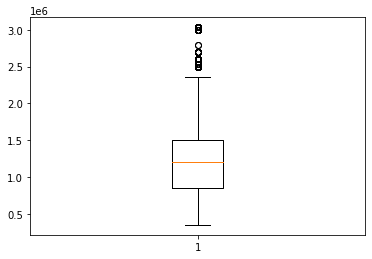

In [ ]:
#boxplot with mathplotlib, melihat outlier yang dapat terjadi
plt.boxplot(data.harga)
plt.plot()

Mengatasi Outlier

Setelah kita mengetahui outlier harga, selanjutnya kita akan atasi Outlier dengan menggunakan metode interquartile range (IQR). Untuk detil jelasnya, bisa dilihat di ilustrasi di bawah ini:

Gunakan hasil dari pengolahan di tahap sebelumnya 'data' untuk di olah di tahap ini. Gunakan fungsi quantile() untuk melihat quantile tertentu, dan gunakan mask() untuk mereplace nilai. Tentukan:
Nilai Minimum dan Maximum data di tolerir
Ubah Nilai yg di luar Range Minumum & Maximum ke dalam nilai Minimum dan Maximum

In [ ]:
# Handling with IQR
Q1 = (prep_data[['harga']]).quantile(0.25)
Q3 = (prep_data[['harga']]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
more_than = (prep_data > maximum)
lower_than = (prep_data < minimum)
prep_data = prep_data.mask(more_than, maximum, axis=1)
prep_data = prep_data.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier: ')
print(prep_data[['harga']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
harga    2.406218
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
harga   -2.712277
dtype: float64

Persebaran data setelah ditangani Outlier: 
              harga
count  11000.000000
mean      -0.017264
std        0.950109
min       -1.777168
25%       -0.792841
50%       -0.103813
75%        0.486783
max        2.406218


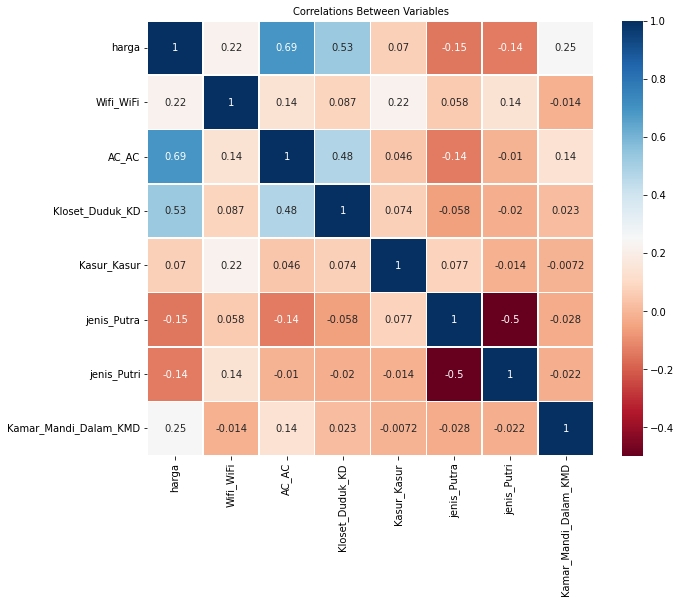

In [ ]:
plt.figure (figsize=(10,8))
sns.heatmap(prep_data.corr(), annot=True, linewidth=.5, cmap= "RdBu")
plt.title("Correlations Between Variables", size=10)
plt.show()

In [ ]:
numeric_cols = prep_data.select_dtypes(include = [np.number])
corr = numeric_cols.corr()
print ('The Most Correlated Features with Harga:'), print (corr['harga'].sort_values(ascending = False)[:10], '\n')
print ('The Most Uncorrelated Features with Harga:'), print (corr['harga'].sort_values(ascending = False)[-5:])

The Most Correlated Features with Harga:
harga                    1.000000
AC_AC                    0.691486
Kloset_Duduk_KD          0.528171
Kamar_Mandi_Dalam_KMD    0.246294
Wifi_WiFi                0.217573
Kasur_Kasur              0.070490
jenis_Putri             -0.136998
jenis_Putra             -0.147515
Name: harga, dtype: float64 

The Most Uncorrelated Features with Harga:
Kamar_Mandi_Dalam_KMD    0.246294
Wifi_WiFi                0.217573
Kasur_Kasur              0.070490
jenis_Putri             -0.136998
jenis_Putra             -0.147515
Name: harga, dtype: float64


(None, None)

In [ ]:
prep_data[['harga']].describe()

,harga
count,11000.000000
mean,-0.017264
std,0.950109
min,-1.777168
25%,-0.792841
50%,-0.103813
75%,0.486783
max,2.406218


In [ ]:
data_duplicates = prep_data[prep_data.duplicated()]
print(data_duplicates.shape)

(10601, 8)


In [ ]:
#mengimplementasikan train/test
from sklearn.model_selection import train_test_split

In [ ]:
X = prep_data.drop(['harga'], axis = 1)
y = prep_data['harga']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# untuk mengatasi pengulangan proses hasil running yang berubah-ubah
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
print(X_train)

       Wifi_WiFi  AC_AC  Kloset_Duduk_KD  Kasur_Kasur  jenis_Putra  \
3645           0      1                1            1            0   
3107           1      0                0            1            0   
10391          1      0                1            1            0   
2040           1      0                0            1            1   
281            1      1                1            1            0   
...          ...    ...              ...          ...          ...   
6400           0      1                1            0            0   
9160           1      1                0            1            0   
9859           1      1                1            1            0   
1688           1      1                1            1            0   
5994           1      1                0            1            0   

       jenis_Putri  Kamar_Mandi_Dalam_KMD  
3645             0                      1  
3107             1                      1  
10391            1         

In [ ]:
print(X_test)

      Wifi_WiFi  AC_AC  Kloset_Duduk_KD  Kasur_Kasur  jenis_Putra  \
8789          1      1                1            1            0   
4239          1      0                1            1            1   
5277          1      0                1            1            0   
3910          0      1                0            1            0   
9015          1      1                1            1            0   
...         ...    ...              ...          ...          ...   
4998          1      0                0            0            0   
1983          1      1                1            1            0   
8946          1      1                1            1            0   
5764          0      1                1            0            0   
506           1      0                0            1            1   

      jenis_Putri  Kamar_Mandi_Dalam_KMD  
8789            0                      1  
4239            0                      0  
5277            0                      1  

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import pickle

In [ ]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [ ]:
forest_reg_model =RandomForestRegressor(n_estimators = 64, random_state = 32, max_depth = 20,)
forest_reg_model.fit(X_train_scaled, y_train);

In [ ]:
y_pred = forest_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_forest_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_forest_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_forest_reg =np.sqrt(MSE_forest_reg)
pd.DataFrame([MAE_forest_reg, MSE_forest_reg, RMSE_forest_reg], 
    index=['MAE_forest_reg', 'MSE_forest_reg', 'RMSE_forest_reg'], columns=['Metrics'])

,Metrics
MAE_forest_reg,0.408251
MSE_forest_reg,0.296433
RMSE_forest_reg,0.544457


In [ ]:
scores = cross_val_score(forest_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.80787854 0.82361728 0.82208194 0.83177699 0.82580809]


In [ ]:
r2_score(y_test, forest_reg_model.predict(X_test_scaled))

0.6716449987432715

In [ ]:
res = forest_reg_model.predict([[0, 1, 1, 1, 1, 1, 1]])
print(numeric_scaler.inverse_transform([res])[0][0])

1554613.149900678


In [ ]:
res = forest_reg_model.predict([[0, 1, 0, 1, 1, 1, 1]])
print(numeric_scaler.inverse_transform([res])[0][0])

1554613.149900678


In [ ]:
res = forest_reg_model.predict([[0, 1, 0, 1, 0, 1, 1]])
print(numeric_scaler.inverse_transform([res])[0][0])

1554613.149900678


In [ ]:
res = forest_reg_model.predict([[0, 0, 0, 0, 1, 0, 0]])
print(numeric_scaler.inverse_transform([res])[0][0])

1509990.0779487886


In [ ]:
pickle.dump(forest_reg_model, open('model.pkl','wb'))

In [ ]:
scalerfile = 'scaler.sav'
pickle.dump(numeric_scaler, open(scalerfile, 'wb'))